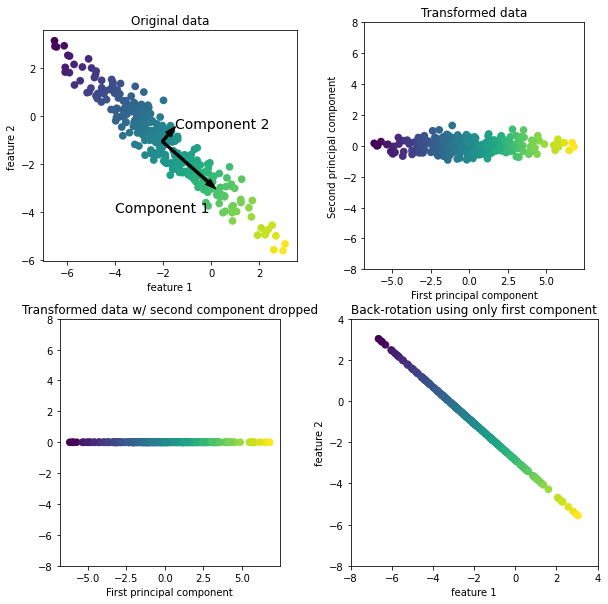

In [2]:
import mglearn
mglearn.plots.plot_pca_illustration()

original data shape: (569, 30)
pca data shape: (569, 2)
training set accuracy:0.9577464788732394
test set accuracy:0.9230769230769231
pca component shape: (2, 30)


Text(0, 0.5, 'Principle components')

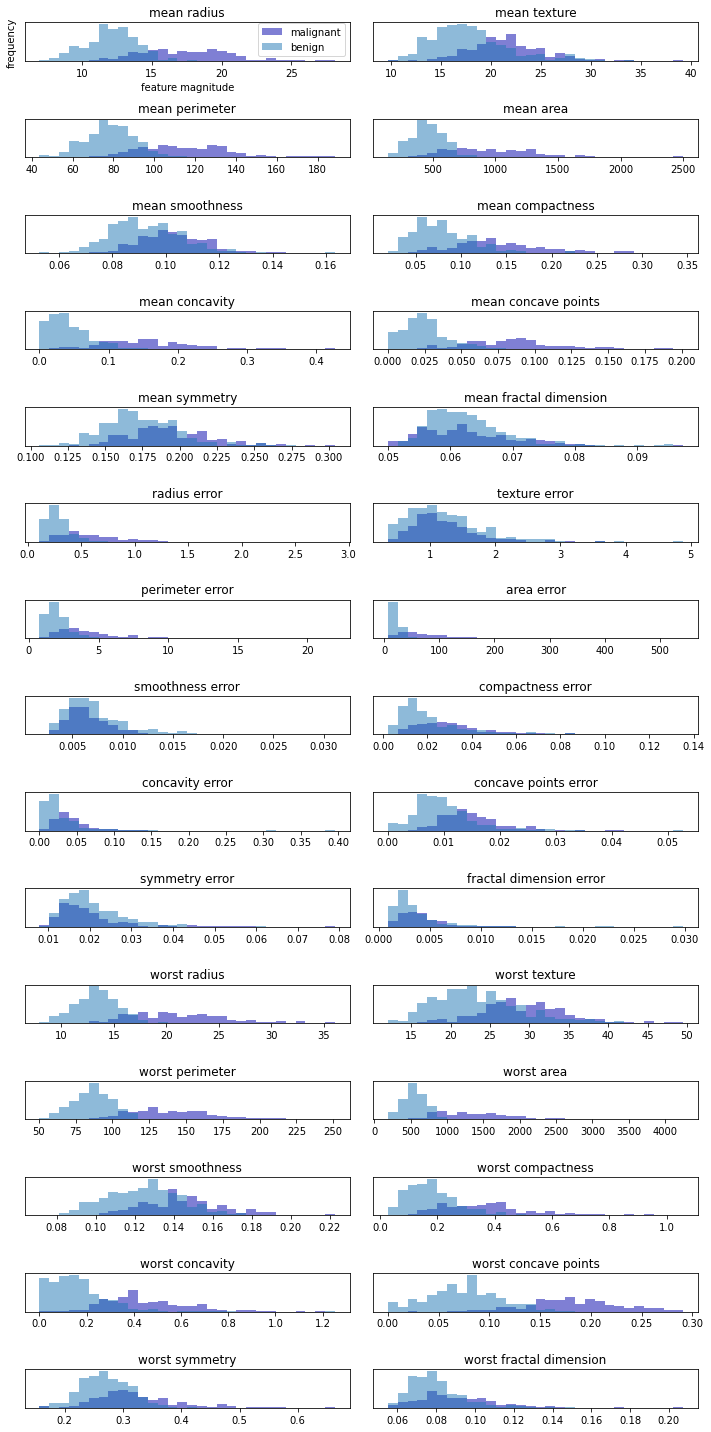

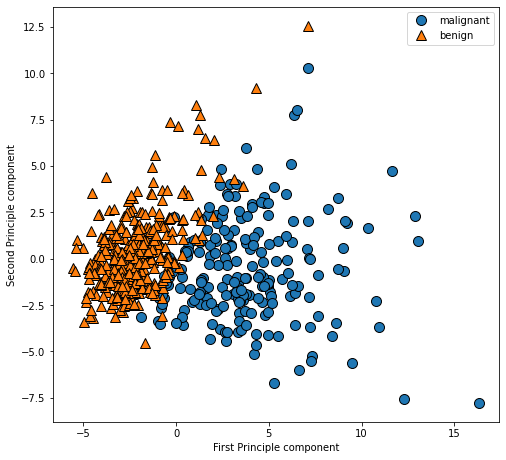

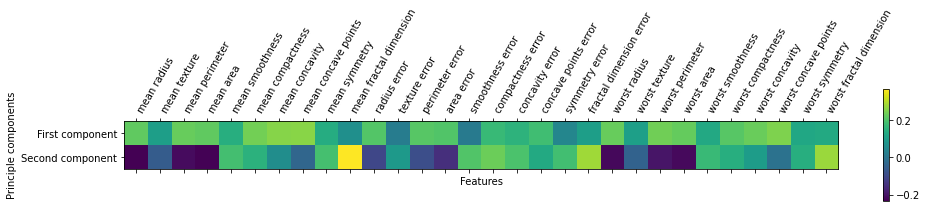

In [18]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=30)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("feature magnitude")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

scaler_std = StandardScaler()
scaler_std.fit(cancer.data)
X_scaled = scaler_std.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("original data shape: {}".format(str(X_scaled.shape)))
print("pca data shape: {}".format(str(X_pca.shape)))

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First Principle component")
plt.ylabel("Second Principle component")

X_train, X_test, y_train, y_test = train_test_split(X_pca, cancer.target, random_state=0)

scaler =  StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lrg = SVC()
lrg.fit(X_train_scaled, y_train)

print("training set accuracy:{}".format(lrg.score(X_train_scaled, y_train)))
print("test set accuracy:{}".format(lrg.score(X_test_scaled, y_test)))

print("pca component shape: {}".format(pca.components_.shape))

#here the first component all have similar color, that means all 30 features are highly correlated. Changes in any individual affect the whole
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("Principle components")


people.images.shape: (3023, 87, 65)
Number of classes: 62
Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Ji

C:\Users\Programmer\AppData\Local\Temp\ipykernel_10832\3010143229.py:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


Test set score for 1nn: 0.14
Test set score after whitening: 0.15
X_train_scaled.shape:(1547, 100)
pca.components_: 100




NameError: name 'X_train_nmf' is not defined

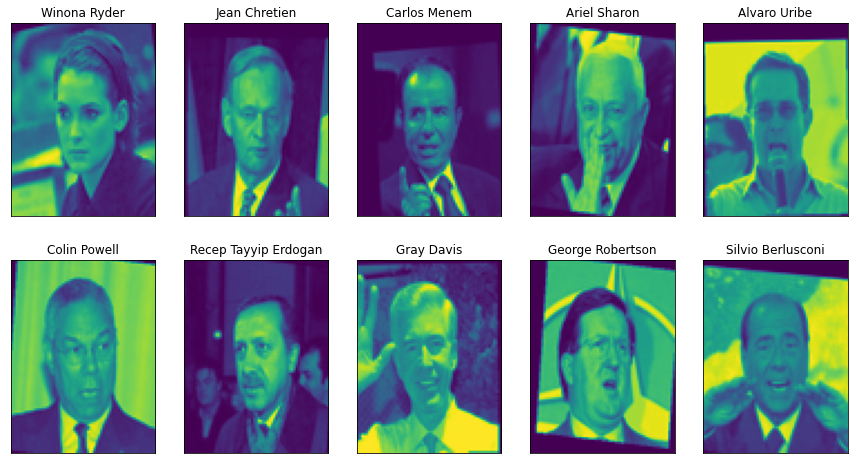

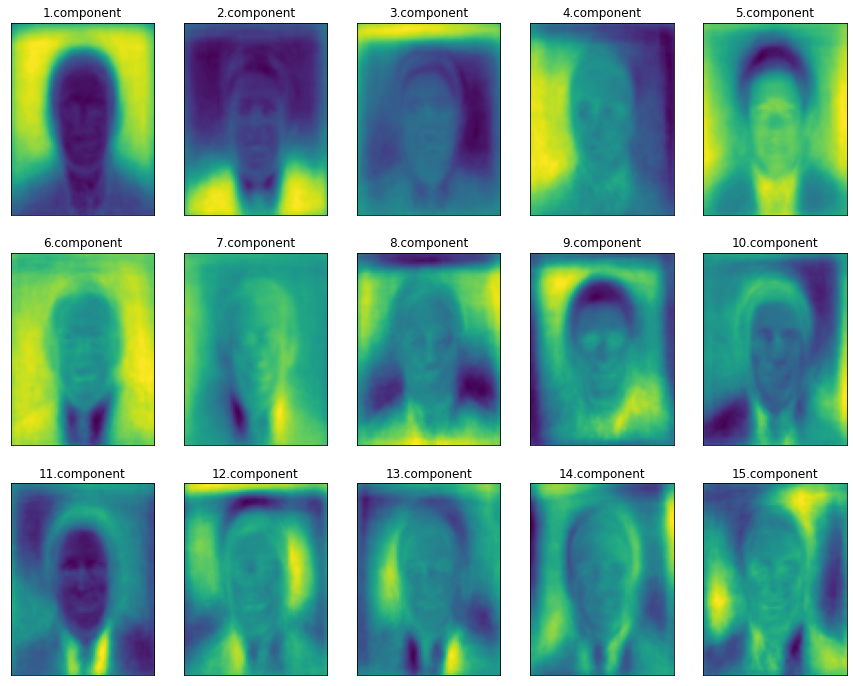

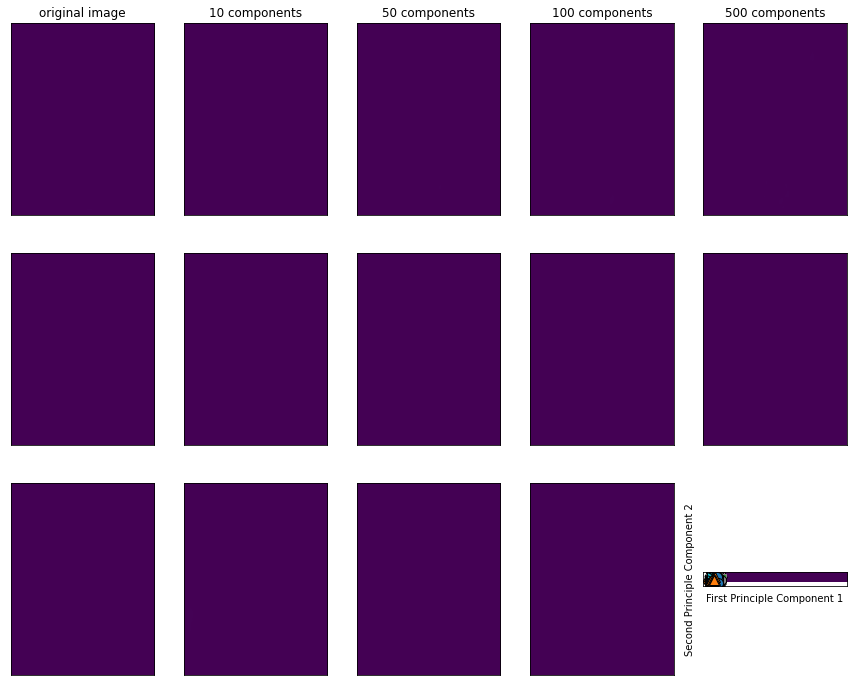

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

#count how frequent each target appears
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='  ')
    if (i+1)%3 == 0:
        print()
        
#take only 50 images of each
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score for 1nn: {:.2f}".format(knn.score(X_test, y_test)))

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_pca, y_train)
print("Test set score after whitening: {:.2f}".format(knn.score(X_test_pca, y_test)))
print("X_train_scaled.shape:{}".format(X_train_pca.shape))
print("pca.components_: {}".format(len(pca.components_)))
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format((i+1)))
    
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

print("\n")
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First Principle Component 1")
plt.ylabel("Second Principle Component 2")



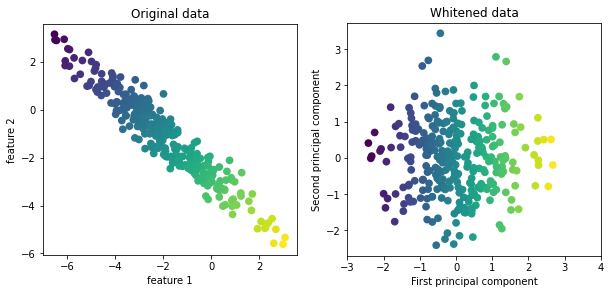

In [6]:
import mglearn

mglearn.plots.plot_pca_whitening()